# **Data Upload**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [4]:
# Set the image directory
img_dir = "/content/drive/MyDrive/data/image_data/"

# Read data
train = pd.read_csv("/content/drive/MyDrive/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data/test_Rj9YEaI.csv")
dim = pd.read_csv("/content/drive/MyDrive/data/bbox_train.csv")



In [5]:
train.head()

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [6]:
# Create lists for train and test image paths
train_img_paths = [os.path.join(img_dir, filename) for filename in train['Name']]
test_img_paths = [os.path.join(img_dir, filename) for filename in test['Name']]

# Display the first few paths as an example
print("Train Image Paths:")
print(train_img_paths[0])

print("\nTest Image Paths:")
print(test_img_paths[0])

Train Image Paths:
/content/drive/MyDrive/data/image_data/10001.jpg

Test Image Paths:
/content/drive/MyDrive/data/image_data/10005.jpg


**Show image**

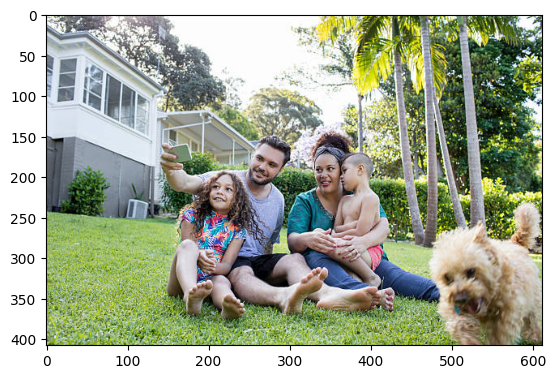

In [7]:
from PIL import Image

# Display the image using Matplotlib
img1=Image.open(train_img_paths[0])
plt.imshow(img1)
plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import img_to_array

img1_array = img_to_array(img1)
img1_array.shape

(408, 612, 3)

In [9]:
np.max(img1_array)

255.0

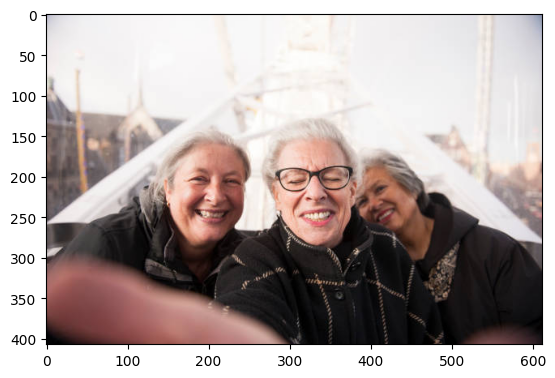

In [10]:
# Display the image using Matplotlib
img2=Image.open(test_img_paths[0])
plt.imshow(img2)
plt.show()

In [11]:
img2_array = img_to_array(img2)
img2_array.shape

(407, 612, 3)

In [12]:
np.max(img2_array)

255.0

<Axes: >

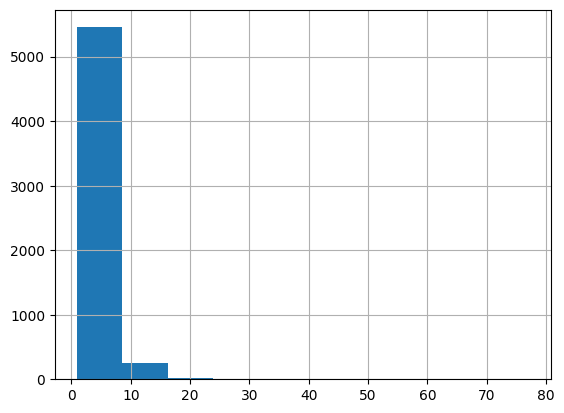

In [16]:
train["HeadCount"].hist()

# **Image Preprocessing**

In [17]:
# Their may some gary images exist so Convert all images to RGB mode
# Normalize pixel values to the range [0, 1]
# check the shape of each image
def load_images_color(image_list, img_dir, target_size=(128, 128)):
    images = []
    for img_name in image_list:
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path).convert('L')
        img = img.resize(target_size)
        img = np.array(img) / 255.0
        print(img.shape)
        images.append(img)

    return np.array(images)

In [18]:
X_train_color = load_images_color(train['Name'], img_dir)

Streaming output truncated to the last 5000 lines.
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(12

In [ ]:
X_test_color = load_images_color(test['Name'], img_dir)

**Check Whether all images are resized or not**

In [20]:
expected_size = (128, 128)

for i, img in enumerate(X_train_color):
    if img.shape != expected_size:
        print(f"Image {i + 1} did not resize correctly. Size is {img.shape}.")
        break
else:
    print("All images resized correctly.")

All images resized correctly.


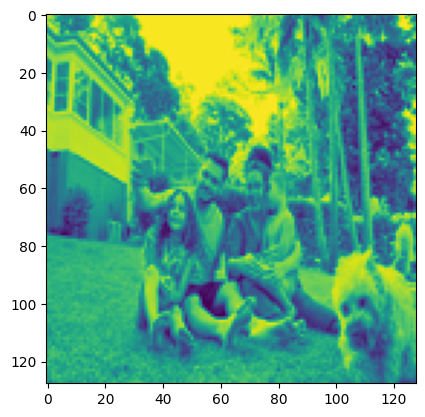

In [21]:
plt.imshow(X_train_color[0])
plt.show()

In [ ]:
# plt.imshow(X_test_color[0])
# plt.show()

In [22]:
test.head()

,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg


In [23]:
dim.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


# **Create model**

# **`150,150 images`**





In [24]:
len(X_train_color)

5733

In [ ]:
len(X_test_color)

In [36]:
import tensorflow as tf

model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(128,128,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    #DNN Arch

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

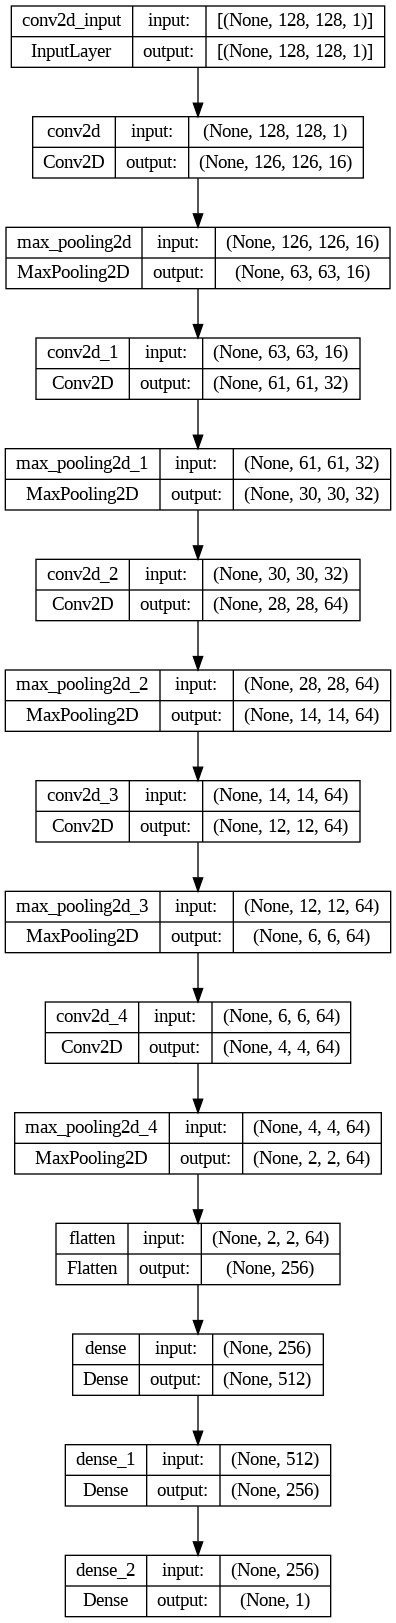

In [28]:
from tensorflow.keras.utils import plot_model

# Save the visualization to a file PNG
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**compile the model**

In [37]:
# from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta

# model.compile(loss='mean_squared_error',
#               optimizer=Adadelta(),
#               metrics =['accuracy'])

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics =['mae'])

**Data Splitting**

In [38]:
y_train = train['HeadCount'].values
X_train, X_val, y_train, y_val = train_test_split(X_train_color, y_train, test_size=0.2, random_state=42)


**Train the model**

In [39]:
# model.fit(
#           X_train,
#           y_train,
#           epochs=10,
#           verbose=1,
#           validation_data=(X_val, y_val)
#           )

model.fit(
          X_train,
          y_train,
          epochs=10,
          validation_data=(X_val, y_val)
          )

Epoch 1/10
144/144 [==============================] - 83s 566ms/step - loss: 6.3553 - mae: 1.6914 - val_loss: 10.0586 - val_mae: 1.6721
Epoch 2/10
144/144 [==============================] - 70s 483ms/step - loss: 5.7010 - mae: 1.6175 - val_loss: 9.9748 - val_mae: 1.6343
Epoch 3/10
144/144 [==============================] - 70s 488ms/step - loss: 5.2986 - mae: 1.5501 - val_loss: 9.9211 - val_mae: 1.6901
Epoch 4/10
144/144 [==============================] - 71s 495ms/step - loss: 5.5195 - mae: 1.5958 - val_loss: 10.3343 - val_mae: 1.8886
Epoch 5/10
144/144 [==============================] - 70s 489ms/step - loss: 5.1625 - mae: 1.5458 - val_loss: 9.7657 - val_mae: 1.7080
Epoch 6/10
144/144 [==============================] - 73s 510ms/step - loss: 5.1870 - mae: 1.5266 - val_loss: 10.6126 - val_mae: 1.5797
Epoch 7/10
144/144 [==============================] - 74s 512ms/step - loss: 4.9012 - mae: 1.4935 - val_loss: 10.5046 - val_mae: 1.5651
Epoch 8/10
144/144 [==============================]

**Comparison**

In [41]:
train_predictions = model.predict(X_train)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual_HeadCount': y_train, 'Predicted_HeadCount': train_predictions.flatten()})

144/144 [==============================] - 18s 125ms/step


In [42]:
train_predictions

array([[3.4151137],
       [5.501501 ],
       [4.571684 ],
       ...,
       [4.3965287],
       [5.962717 ],
       [3.8428226]], dtype=float32)

In [43]:
# Display the DataFrame
comparison_df.head(40)

,Actual_HeadCount,Predicted_HeadCount
0,1,3.415114
1,3,5.501501
2,7,4.571684
3,7,7.949389
4,4,3.584465
5,4,3.827692
6,3,3.795454
7,2,4.649789
8,5,4.600801
9,3,3.604524


**Upload from Loacl Disk**

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

uploaded = files.upload()
print("upload" , uploaded)
for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = Image.open(path).convert('L')
  img = img.resize((128, 128))
  img= np.array(img) / 255.0

  count = model.predict(img)
  print("Head count is:", count)

**Prediction**

# **`300,300 images`**



